<img src="images/mpl_logo.svg" width="400"> <img src="images/seaborn_logo.svg" width="400">

# **How to Customize Matplotlib and Seaborn Plots with .mplstyle Sheets**

### Author: Ian Sharff
### GitHub Repository: <a href="https://github.com/iansharff/customize_mpl">github.com/iansharff/customize_mpl</a>

If you are new to creating data visualizations with Python, it is not unlikely that you've run into the struggles of delving deep into the catacombs of the <a href="https://matplotlib.org/3.3.3/contents.html">Matplotlib</a> and <a href="https://seaborn.pydata.org/">Seaborn</a> documentation pages to try and change the smallest details of your plots away from the defaults. While both Matplotlib and Seaborn do a excellent jobs of providing built-in styles to work with, I know I always felt myself wanting to make my graphs a little bit more unique with some personal _flare_. I warn you now: there is no substitute for reading through the documentation and getting a basic understanding the nature of the vast collection of objects and plotting functions available in these libraries. But, if you are a tactile learner like myself, you'll probably learn ten times as much by getting your hands dirty and practicing the skills yourself. Continue reading if you would like to learn how to

* Create custom styles by setting parameters with an .mplstyle file 
* Exercise greater control over the fonts and colors used in your plots
* Decide when to use Seaborn vs. Matplotlib

For this demonstration, I'll use the following imports, so it's important that they're all installed to your environment. You can download them using `pip install <library_name>`, replacing `<library_name>` with `pandas`, `numpy`, `matplotlib` and `seaborn` if they are not already installed to your environment, then you can import them with the standard aliases, and if you're using Jupyter, then you can add `%matplotlib inline` to avoid having to execute `plt.show()` for each plot.

For those new to any of these Python libraries, I suggest first reading the documentation/watching some YouTube tutorials (which I'll link below) to get some basic working knowledge. We'll start with some `matplotlib` plots using `numpy` to generate the points.

In [1]:
# Arrays and DataFrames
import numpy as np
import pandas as pd

# Visualizations
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## With `matplotlib`

The default settings that `matplotlib` visualizations use when other parameters are not passed to plotting functions are contained in the library's attribute `rcParams`, which can be thought of as a sort of global dictionary that can be accessed/altered just as any user-defined dictionary in python. This can be accessed with `matplotlib.rcParams` or in this case, since we are using an alias, `mpl.rcParams`. During a Python or IPython session, these can be changed dynamically using dictionary subscripting, but by using an `.mplstyle` file (an example is included further below and in this article's repository) we can avoid having to set these parameters manually for every session.

First, we'll plot three points and see what we get. You'll notice that the line does not include markers for the actual points by default when plotting a line. This is because the `lines.marker` key in `rcParams` is assigned to `None` by default. To change this for just one plot, we pass in `marker='o'`, for example, if we want dots. We'll also give it a title and axis labels.

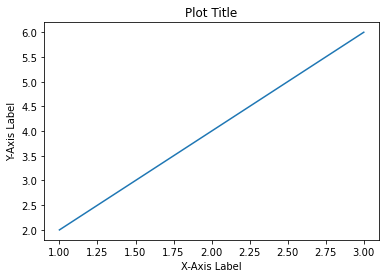

In [2]:
# Defining Points
x = [1, 2, 3]
y = [2, 4, 6]

# Plotting x vs. y
plt.plot(x, y)

# Assigning Labels
plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Plot Title')

# Display the current figure
plt.show()

And now with markers...

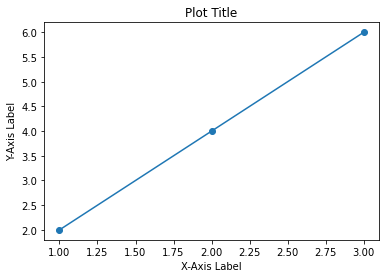

In [3]:
plt.plot(x, y, marker='o')

plt.xlabel('X-Axis Label')
plt.ylabel('Y-Axis Label')
plt.title('Plot Title')

plt.show()

If we want all plots we create in a given context to have markers, we can set this directly in `rcParams`. To access the `rcParams` value we just access the `lines.marker` key just as we would with any Python dictionary. As we can see, it is `None` by default. If we assign this value to `'o'`, then all plots made after that line's execution will include circle markers by default.

In [4]:
mpl.rcParams['lines.marker']

'None'

However, say that you want some plots to use certain parameters while using the defaults (or another custom style) for other types of plots. Manually setting these parameters for each plot somewhat defeats the purpose, since they are global and will need to be changed each time. Unless you know from the onset that you want all plots to use the same parameters.

These parameters can be set in an external file with the extension `.mplstyle`, which at the most basic level can be accessed in two ways:

* Setting it for an entire script/notebook with `plt.style.use('<file_path>')
* Only using it for a certain code block using `with plt.style.context('<file_path>'):` followed by indented code

To demonstrate this, I've created a sample style sheet called `custom.mplstyle` that we'll access using the second method above.

First, let's plot a simple family of functions, $f(x) = x^2 + c$, where $x$ is between -5 and 5 and c ranges from 1 to 30 in multiples of 3, giving 10 curves. When plotting these lines on the same `matplotlib.Axes` object, Matplotlib will automatically give them different colors to identify them, using a default `cycler`. We'll define a function to plot them for us, along with our $x$ values and function, $f(x)$, defined as `x` and `f` respectively. 

In [9]:
# Values for the x-axis, 11 points from -5 to 5
x = np.linspace(-5, 5, 41)

# Define function to plot: x^2
f = lambda x: x ** 2

# Define values for c:  0, 3, 6, 9, ... 30
c = np.arange(0, 31, 3)

def plot_family(x_vals, f, c_vals):
    for c in c_vals:
        plt.plot(x, f(x)+c)  
    plt.title('Plot Title')
    plt.xlabel('X-Axis Label')
    plt.ylabel('Y-Axis Label')
    plt.show();

First we'll call the function without the style sheet for comparison, which will use the default color cycler, font, font sizes, and grid parameters that are set in `rcParams`.

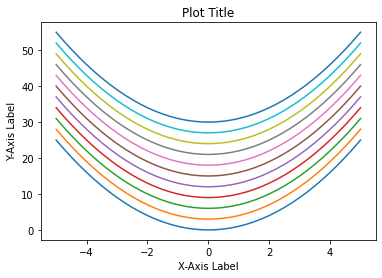

In [10]:
plot_family(x, f, c)

Now, using the style sheet...

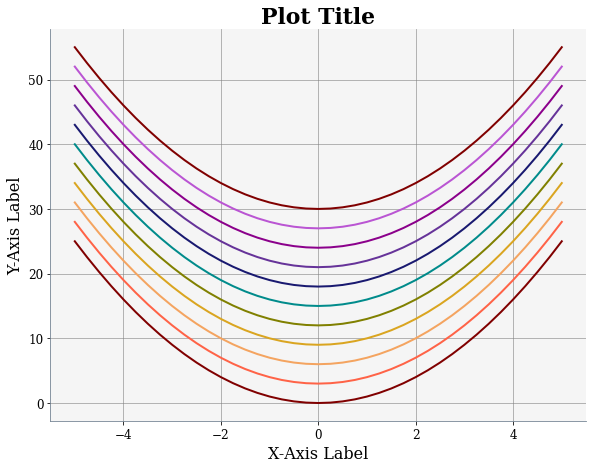

In [11]:
with plt.style.context('./custom.mplstyle'):
    plot_family(x, f, c)

## With `seaborn`

Since the `seaborn` library is built on top of matplotlib, it too can make use of an .mplstyle sheet to provide customization to your plots. To demonstrate this, we'll take a look at the Iris dataset to generate some simple plots. For context, this dataset contains 150 records with petal and sepal measurements of three species of _Iris_ flowers, along with their labels of _setosa_, _virginica_ and _versicolor_. The `seaborn` library conveniently includes this dataset, which saves us some work.

In [14]:
# Load the dataset
iris = sns.load_dataset('iris')

# Display the first 5 rows
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Using Seaborn's `scatterplot` function, we can construct a figure plotting any of these measurements against another in a 2D plot while coloring each species of flower with a different hue. Seaborn has several other default styles that can be used. We'll show the default style, then the `'darkgrid'` style, and then compare to the custom style defined in `custom.mplstyle`.

In [28]:
def petal_length_v_width(data):
    sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=data)
    plt.title('Petal Length vs. Petal Width in Iris Flowers')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show();

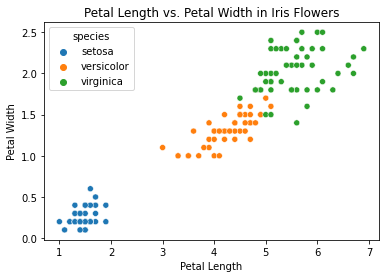

In [29]:
# Default
petal_length_v_width(iris)

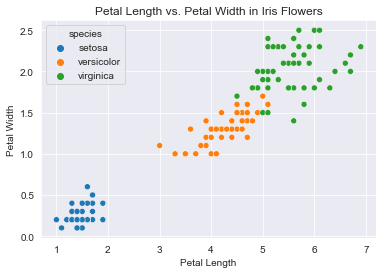

In [31]:
# Using 'darkgrid' seaborn style
with sns.axes_style('darkgrid'):
    petal_length_v_width(iris)

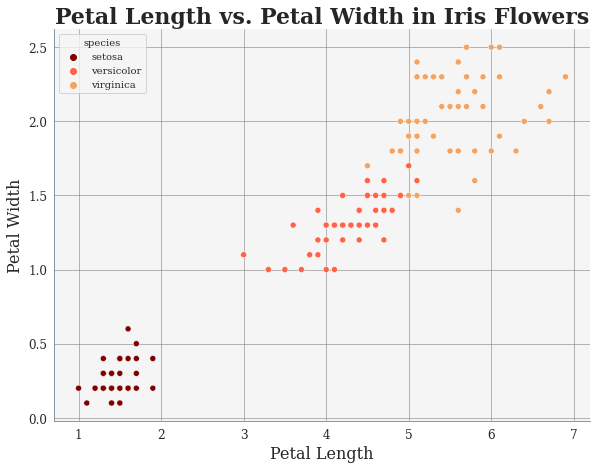

In [32]:
with plt.style.context('custom.mplstyle'):
    petal_length_v_width(iris)

As you can see, a lot of information can be wrapped into a style sheet to avoid repeated formatting of plots, especially if you know that certain parameters should be uniform across all visualizations you create. While using a style sheet may be slightly more labor intensive at the beginning, it can definitely help keep your code D.R.Y. (i.e. Don't Repeat Yourself). Also, writing a style sheet at the beginning of a project can save you a lot of work in the future and helps to keep your plots looking consistent, and overall much more interesting and attention-grabbing than the default plot settings.

For further information check out the following documents, articles, and videos which I have found very helpful for all aspects of data visualization. Also, feel free to clone the repository for this notebook and let me know if there's any other topics I should cover.
___

Documentation:
* <a href="https://numpy.org/doc/stable/">NumPy</a>
* <a href="https://pandas.pydata.org/docs/">Pandas</a>
* <a href="https://matplotlib.org/">Matplotlib</a>
* <a href="https://seaborn.pydata.org/">Seaborn</a>

Further Reading:
* <a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html#matplotlibrc-sample">Customizing Matplotlib with style sheets and rcParams</a>
* <a href="https://seaborn.pydata.org/tutorial/aesthetics.html"> Controlling Figure Aesthetics: Seaborn</a>
* <a href="https://www.tutorialspoint.com/numpy/numpy_matplotlib.htm">Using NumPy with Matplotlib</a>

Video Tutorials:
* <a href="https://youtu.be/UO98lJQ3QGI">Matplotlib Tutorial (Part 1)</a>
* <a href="https://youtu.be/6GUZXDef2U0">Seaborn Tutorial 2021</a>
* <a href="https://youtu.be/r-uOLxNrNk8">Data Analysis with Python - Full Course for Beginners (Numpy, Pandas, Matplotlib, Seaborn</a>